# **ARTIFICIAL INTELLIGENCE INTERNSHIP FROM INFOSYS SPRINGBORAD**

### **THIS NOTEBOOK BELONGS TO TEAM 3 AND CONSIST OF ALL THE WORK FROM WEEK 1 TO WEEK 4**

## DISASTER TWEET ANALYZER USING MACHINE LEARNING

**The Disaster Tweet Analyzer project aims
to develop a system that can classify,
categorize, and analyse disaster-related
tweets to provide valuable insights for
emergency response and disaster
management.**

**By leveraging machine
learning and natural language processing
techniques, this project seeks to enhance
situational awareness for emergency
responders, improve disaster response
and management, and support data-
driven decision-making.**

#### DATE & TIME: 9 OCTOBER 2024 , 9 P.M.

#### AGENDA:
Data Selection & Acquisition, and Student Progress Review for "Disaster Tweet Analyzer"

In [2]:
#------------------------IMPORT NECESSARY LIBRARIES----------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#to keep everything in one plane
%matplotlib inline

In [3]:
# warnings module in Python provides a way to control how warnings handled within a Python script
import warnings
warnings.filterwarnings('ignore')#ignore the warnings

LOADING THE TWITTER TWEET DATASET INTO DATAFRAME

In [4]:
Twitter_Data= pd.read_csv('twittertweets_dataset.csv')

DATA INSPECTION (BASIC CHECKING)

In [6]:
#displays top 5 row values
Twitter_Data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
#this displays last 5 row values
Twitter_Data.tail()

,id,keyword,location,text,target
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


In [ ]:
# this is for finding out the shape of the data. basic row & columns
Twitter_Data.shape

(11370, 5)

Q1. WHAT IS THE NUMBER OF ROWS AND COLUMNS IN OUR DATASET?

In [ ]:
#prints the no. of rows and columns
print("Number of Rows here are",Twitter_Data.shape[0])
print("Number of Columns here are",Twitter_Data.shape[1])

Number of Rows here are 11370
Number of Columns here are 5


REMOVING UNWANTED COLUMNS i.e. ID

In [5]:
Twitter_Data.drop(Twitter_Data.columns[[0]],axis=1,inplace=True)

Q2. WHAT are the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement or PROVIDE COMPLETE INFOMATION OF THE DATA?

In [ ]:
Twitter_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11370 non-null  object
 1   location  7952 non-null   object
 2   text      11370 non-null  object
 3   target    11370 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 355.4+ KB


Q3. WRITE the COMPLETE Statistics About The Data?

In [ ]:
Twitter_Data.describe()

,target
count,11370.000000
mean,0.185928
std,0.389066
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Q4. IS THERE ANY NULL VALUES PRESENT IN THE DATASET?

In [ ]:
Twitter_Data.isnull()

,keyword,location,text,target
0,False,True,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
11365,False,False,False,False
11366,False,False,False,False
11367,False,False,False,False
11368,False,False,False,False


Q5. FIND OUT THE SUM OF NULL VALUES PRSENT IN THE DATASET FOR EACH COLUMN?

In [ ]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,3418
text,0
target,0


Q7. WRITE THE STEPS TO FIND DUPLICATE VALUES IN THE DATASET?

In [ ]:
# step1 .we have to use the duplicated().any() function to find any duplicate values in the dataset
Twitter_Data.duplicated().any()

False

AS THE RESULT IS FALSE IT MEANS THAT THERE ARE NO DUPLICATED VALUES IN THE DATASET

## DESCRIPTIVE ANALYSIS

In [ ]:
# Tweet distribution
keyword_counts = Twitter_Data['keyword'].value_counts()
location_counts = Twitter_Data['location'].value_counts()

In [ ]:
# Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
Twitter_Data['sentiment'] = Twitter_Data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

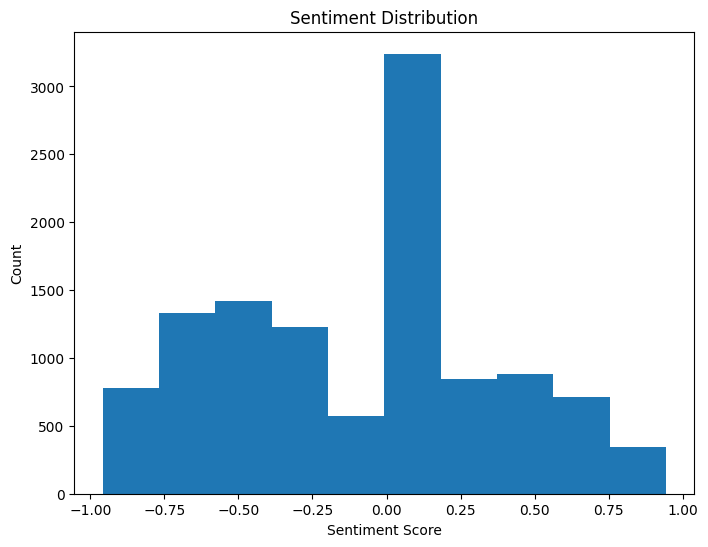

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8,6))
plt.hist(Twitter_Data['sentiment'], bins=10)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# Location frequency
location_freq = Twitter_Data['location'].value_counts()

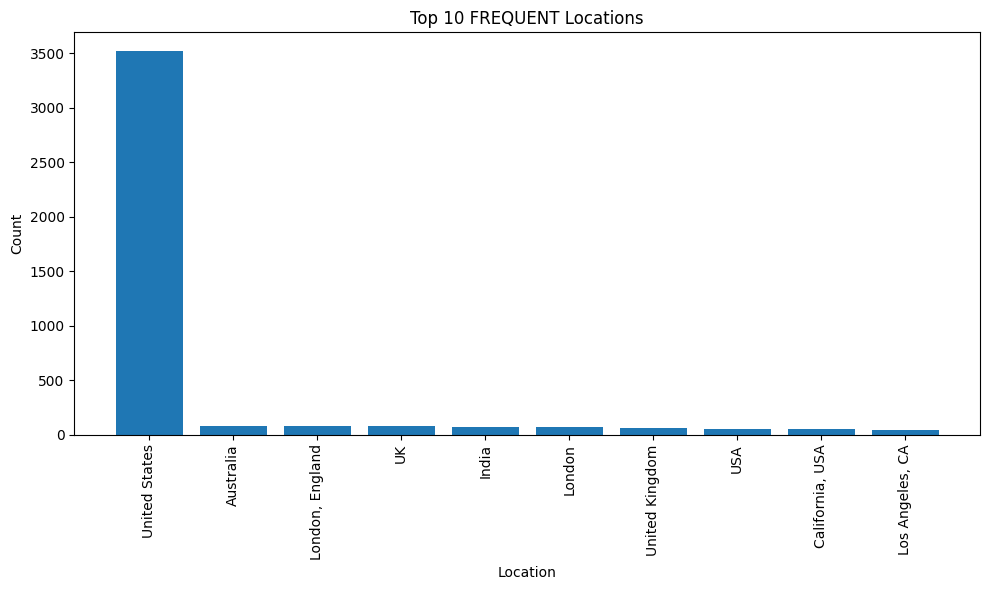

In [ ]:
# Plot location frequency
plt.figure(figsize=(10,6))
plt.bar(location_freq.index[:10], location_freq.values[:10])
plt.title('Top 10 FREQUENT Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels 90 degrees
plt.tight_layout()
plt.show()

#### Analyzing the length of tweets in the dataset

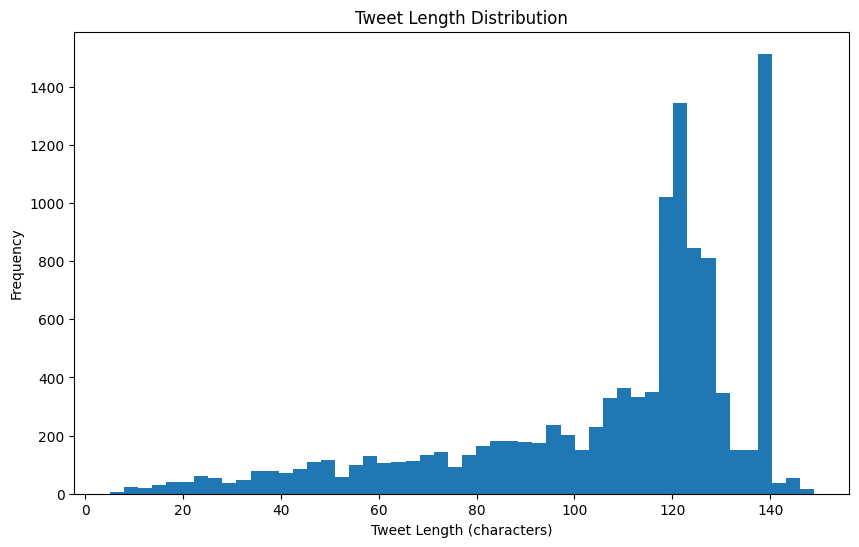

In [6]:
# Calculate tweet length
Twitter_Data['tweet_length'] = Twitter_Data['text'].apply(len)

# Plot tweet length distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(Twitter_Data['tweet_length'], bins=50)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Calculate longest and shortest tweets
longest_tweet = Twitter_Data.loc[Twitter_Data['tweet_length'].idxmax()]['text']
shortest_tweet = Twitter_Data.loc[Twitter_Data['tweet_length'].idxmin()]['text']
print(f"Longest Tweet: {longest_tweet}")
print(f"Shortest Tweet: {shortest_tweet}")

Longest Tweet: &gt; Get new bicycle saddle &gt; Manual entirely in Chinese &gt; I've got engineering qualifications I'm sure I can figure o… https://t.co/mL94RxUiyx
Shortest Tweet: Hello


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


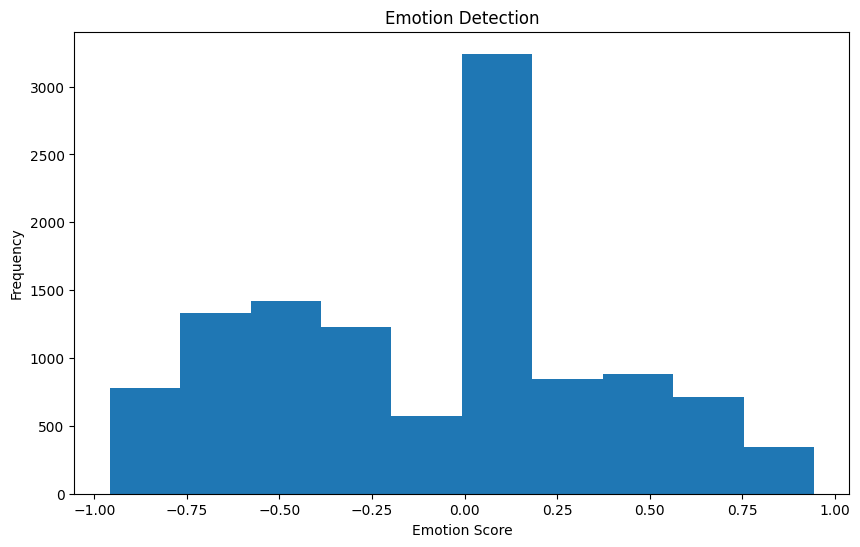

In [9]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER sentiment lexicon if not already downloaded
nltk.download('vader_lexicon')
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# Calculate emotion scores
emotions = Twitter_Data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(emotions, bins=10)
plt.title('Emotion Detection')
plt.xlabel('Emotion Score')
plt.ylabel('Frequency')
plt.show()

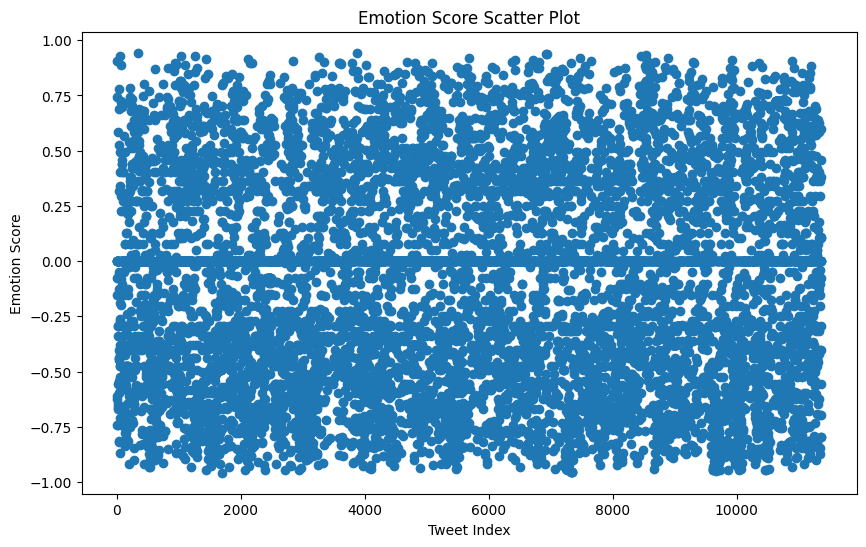

In [10]:
#Emotion Score Scatter Plot
# Calculate emotion scores
emotions = Twitter_Data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot scatter plot
plt.figure(figsize=(10,6))
plt.scatter(range(len(emotions)), emotions)
plt.title('Emotion Score Scatter Plot')
plt.xlabel('Tweet Index')
plt.ylabel('Emotion Score')
plt.show()

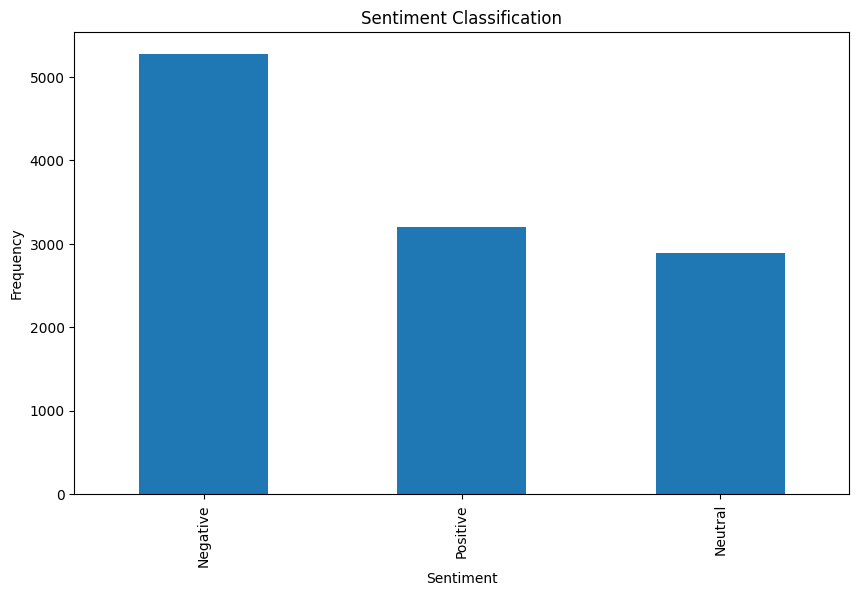

In [11]:
#----------------------------------------Sentiment Classification Bar Chart----------------------------------
# Calculate sentiment labels (positive, negative, neutral)
sentiments = emotions.apply(lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral')

# Plot bar chart
plt.figure(figsize=(10,6))
sentiments.value_counts().plot(kind='bar')
plt.title('Sentiment Classification')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# **WEEK 2**

**TEXT PREPROCESSING for 'text' column**

**Text Preprocessing Steps:**
1. Remove Special Characters: Eliminate non-alphanumeric characters (e.g., @,#,$).
2. Tokenization: Split text into individual words or tokens.
3. Stopword Removal: Remove common words (e.g., "the", "and", "a").
4. Stemming/Lemmatization: Reduce words to their base form.
5. Remove Whitespaces: Eliminate excess whitespace.
6. Convert to Lowercase: Standardize text case.
7. Remove Short Words: Eliminate words with fewer than 3 characters.
8. Vectorization: Convert text data into numerical representations.

1. (#\w+) - Matches hashtags (e.g., #MachineLearning)
2. (RT\s@\w+:) - Matches retweets (RT) followed by a username (e.g., RT @JohnDoe:)
3. (http.*) - Matches URLs (e.g., (link unavailable))
4. (@\w+) - Matches mentions (e.g., @JohnDoe)

In [25]:
import re
import nltk
from nltk.corpus import stopwords

def clean_text(text):
    text = re.sub(r'https?://[^\s]+', '', text)  # Remove links
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove emojis
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\.{3,}$', '', text)  # Remove trailing ellipsis
    text = text.lower()  # Convert to lowercase
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    text = ' '.join(tokens)
    return text

In [26]:
#download the stopwords and punkt
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
Twitter_Data['text'] = Twitter_Data['text'].apply(clean_text)
print(Twitter_Data['text'].head(20))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0     communal violence bhainsa telangana stones pel...
1     telangana section 144 imposed bhainsa january ...
2                  arsonist sets cars ablaze dealership
3                  arsonist sets cars ablaze dealership
4     lord jesus love brings freedom pardon fill hol...
5     child chinese tweet would gone viral social me...
6     several houses set ablaze ngemsibaa village ok...
7     asansol bjp office salanpur village set ablaze...
8     national security minister kan dapaahs side ch...
9     creature whos soul longer clarent blue ablaze ...
10    images showing havoc caused cameroon military ...
11    social media went bananas chuba hubbard announ...
12    hausa youths set area office apapaiganmu local...
13    mamatabanerjee political violence amp vandalis...
14                     amen set whole system ablaze man
15    images showing havoc caused cameroon military ...
16    cows today local factory sadly still ablaze re...
17    rengoku sets heart ablaze ps missed style 

**TEXT PREPROCESSING FOR 'location' column**

Appling similar cleaning and normalization steps to the "location" column:
1. Remove special characters and punctuation.
2. Convert to title case (capitalize first letter of each word).
3. Remove unnecessary words (e.g., "city", "state", "country").
4. Standardize location formats (e.g., "New York, NY" instead of "NYC").

In [27]:
#location needs to be converted into string for this
Twitter_Data['location'] = Twitter_Data['location'].astype(str)
def clean_location(text):
    text = re.sub(r'[^a-zA-Z0-9\s,.-]', '', text)  # Remove special characters
    text = text.title()  # Convert to title case
    text = re.sub(r'\b(city|state|country)\b', '',text, flags=re.IGNORECASE)  # Remove unnecessary words
    text = re.sub(r'\s+', ' ', text)  # Remove excess whitespace
    return text
Twitter_Data['location'] = Twitter_Data['location'].apply(clean_location)

In [ ]:
print(Twitter_Data['location'].head(20))

0                 Nan
1                 Nan
2           New York 
3      Morgantown, Wv
4                 Nan
5                  Oc
6     London, England
7              Bharat
8        Accra, Ghana
9           Searching
10                Nan
11                Nan
12                Nan
13          Hyderabad
14           Reno, Nv
15                Nan
16                Nan
17                Nan
18          Worldwide
19                Nan
Name: location, dtype: object


**I WILL DO EXTRACTION OF LOCATIONS FROM TWEETS BEFORE THE VECTORIZATION AND PUTTING THEM INTO THE NULL VALUES(34I8)**

In [28]:
# Create a copy of the original dataframe to avoid modifying it
df_filled = Twitter_Data.copy()
# Extract locations from text for null values
df_filled['location'] = df_filled.apply(lambda row: extract_location(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

Q6. WRITE THE STEPS TO REMOVE THE NULL VALUES IN THE "LOCATION" COLUMN?

In [29]:
#I will use spacy library cause 1. SpaCy's pre-trained models have excellent performance on entity recognition tasks.
#It can handle various location formats, including cities, countries, and regions.
!pip install spacy
import spacy

In [30]:
import spacy
import pandas as pd
#Load SpaCy model
nlp = spacy.load('en_core_web_sm')
#Define function to extract location
def extract_location(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'GPE': #Geopolitical Entity
            return ent.text
    return None

In [31]:
# Apply function to dataset (fill null-NaN values in 'location')
Twitter_Data['location'] =Twitter_Data.apply(lambda row: extract_location(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

In [ ]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,0
text,0
target,0


**THERE ARE STILL NAN VALUES PRESENT IN THE FORM OF STRING SO WE WILL TRY TO SOLVE IT**

In [ ]:
print(Twitter_Data['location'].head(20))

0                 Nan
1                 Nan
2           New York 
3      Morgantown, Wv
4                 Nan
5                  Oc
6     London, England
7              Bharat
8        Accra, Ghana
9           Searching
10                Nan
11                Nan
12                Nan
13          Hyderabad
14           Reno, Nv
15                Nan
16                Nan
17                Nan
18          Worldwide
19                Nan
Name: location, dtype: object


In [32]:
#This discrepancy is resolved after replacing string 'NaN' with actual NaN using:
Twitter_Data = Twitter_Data.replace('Nan', np.nan)

In [33]:
#Code to fill NaN values:
Twitter_Data['location'] = Twitter_Data.apply(
    lambda row: extract_location(row['text']) if pd.isnull(row['location']) else row['location'],
    axis=1
)

In [ ]:
Twitter_Data.isnull().sum()#spacy filled 710 values

,0
keyword,0
location,3018
text,0
target,0


In [34]:
spacy_extracted = Twitter_Data[(Twitter_Data['location'].notnull()) & (Twitter_Data['location'] != '')]
print(spacy_extracted['location'].head(50))

2                                             New York 
3                                        Morgantown, Wv
5                                                    Oc
6                                       London, England
7                                                Bharat
8                                          Accra, Ghana
9                                             Searching
13                                            Hyderabad
14                                             Reno, Nv
16                                       redjanuary2020
18                                            Worldwide
22                                                Italy
23     Imwaitingforyoutopourmyontomecallmeyourwhispe...
24                                           Okielahoma
27                                           Havana 3Am
31                                       Washington, Dc
32                                                India
33                                     Salta, Ar

**now applying regrex method**

In [35]:
import re#A regular expression (shortened as regex or regexp)
# Define regex pattern for location extraction

In [36]:
location_patterns = [
    r'\b(New|North|South|East|West) \w+\b',  # Directional cities
    r'\b\w+ville\b', #Cities ending in "ville"
    r'\b\w+ city\b', #Cities with "city" suffix
    r'\b\w+ state\b', # States
    r'\b(NY|CA|FL|TX|IL|PA|OH|GA|NC|MI)\b',#Common state abbreviations
    r'\b(USA|United States|America)\b',#Country names
]

In [37]:
def extract_location_regex(text):
    for pattern in location_patterns:
        match = re.search(pattern, text, re.IGNORECASE)#re.IGNORECASE flag for case-insensitive matching.
        if match:
            return match.group()
    return None

In [39]:
# Apply regex function to dataset (fill null values in 'location')
Twitter_Data['location'] = Twitter_Data.apply(lambda row: extract_location_regex(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

In [40]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,2845
text,0
target,0
tweet_length,0
sentiment,0
sentiment_score,0


In [41]:
#we will now use more in depth locations for better accuracy
#updated code includes:1. Additional state abbreviations2. County names3. Zip code pattern4. All 50 US state abbreviations
location_patterns = [
    r'\b(New|North|South|East|West) \w+\b',  # Directional cities
    r'\b\w+ville\b', #Cities ending in "ville"
    r'\b\w+ city\b', #Cities with "city" suffix
    r'\b\w+ state\b', # States
    r'\b(NY|CA|FL|TX|IL|PA|OH|GA|NC|MI)\b',#Common state abbreviations
    r'\b(USA|United States|America)\b',#Country names
    r'\b\d{5}(?:-\d{4})?\b', # Zip codes like The zip code for New York is 10021
    r'\b\w+ County\b',  # Counties
    r'\b(AK|AL|AR|AZ|CA|CO|CT|DE|FL|GA|HI|IA|ID|IL|IN|KS|KY|LA|MA|MD|ME|MI|MN|MO|MS|MT|NC|ND|NE|NH|NJ|NM|NV|NY|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VA|VT|WA|WI|WV|WY)\b',# All state abbreviations
    r'\b(India|Bharat)\b',  #Country names
    r'\b\w+ taluk\b',  #Taluks
    r'\b\w+ tehsil\b',  #Tehsils
    r'\b\w+ mandal\b',  #Mandals
    r'\b(Ahmedabad|Bangalore|Chennai|Delhi|Hyderabad|Kolkata|Mumbai|Pune|Surat)\b',#Major cities
    r'\b(JFK|LAX|EWR)\b',  #airport codes
    r'\b(\d{1,2}\.\d{1,2}° (N|S), \d{1,3}\.\d{1,2}° (E|W))\b',  #geographic coordinates
]

In [42]:
def extract_location_regex(text):
    for pattern in location_patterns:
        match = re.search(pattern, text, re.IGNORECASE)#re.IGNORECASE flag for case-insensitive matching.
        if match:
            return match.group()
    return None

In [43]:
# Apply regex function to dataset (fill null values in 'location')
Twitter_Data['location'] = Twitter_Data.apply(lambda row: extract_location_regex(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

In [44]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,2719
text,0
target,0
tweet_length,0
sentiment,0
sentiment_score,0


In [45]:
#Use re.findall for multiple matches:
def extract_location_regex(text):
    matches = []
    for pattern in location_patterns:
        matches.extend(re.findall(pattern, text, re.IGNORECASE))
    return matches if matches else None

In [46]:
# Apply regex function to dataset (fill null values in 'location')
Twitter_Data['location'] = Twitter_Data.apply(lambda row: extract_location_regex(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

In [ ]:
Twitter_Data.isnull().sum()
#it specifies we did not had any multiple locations

,0
keyword,0
location,2719
text,0
target,0


In [47]:
# Get unique values and counts
location_counts = Twitter_Data['location'].value_counts()

# Print unique values and counts
print(location_counts)

location
                        119
United States           101
Australia                85
London, England          81
Uk                       80
                       ... 
Fort Wayne                1
Buckinghamshire U.K       1
Kingsport, Tennessee      1
Headley, Surrey           1
Auroraborealis            1
Name: count, Length: 4529, dtype: int64


In [48]:
import spacy
import pandas as pd

# Load pre-trained NLP model
nlp = spacy.load("en_core_web_sm")

#Define function to check location with error handling
def check_location(x):
    try:
        return any(ent.label_ == "GPE" and "India" in ent.text for ent in nlp(x).ents)
    except:
        return False

#Apply NLP model to filter India-related locations
india_data = Twitter_Data[Twitter_Data['location'].apply(check_location)]
#Get unique locations and counts for India
india_location_counts = india_data['location'].value_counts()
#Print unique locations and counts
print(india_location_counts)

location
India                        75
Mumbai, India                27
New Delhi, India             25
Bengaluru, India             15
Hyderabad, India             12
                             ..
At-Large In India             1
Greater Noida West, India     1
Uttar Pradesh,India.          1
Jodhpur, India                1
Indianapolis                  1
Name: count, Length: 90, dtype: int64


In [ ]:
print(india_location_counts.nlargest(10))

location
India                75
Mumbai, India        27
New Delhi, India     25
Bengaluru, India     15
Hyderabad, India     12
Kerala, India         7
Kolkata, India        6
Chennai, India        4
Goa, India            3
Chandigarh, India     3
Name: count, dtype: int64


In [49]:
#filling the missing categorial values with modes
#step1.use fillna function to fill the null values with the values most common(mode) in the dataset
#step2. write true to confirm the function or action
Twitter_Data['location'].fillna(str(Twitter_Data['location'].mode().values[0]),inplace=True)

In [ ]:
#step3. confirm if it is really changed
Twitter_Data.isnull().sum()

,0
keyword,0
location,0
text,0
target,0


In [50]:
#----------------------------------AGAIN CLEANING-------------------------------------
import numpy as np

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def clean_location(text):
    # Remove non-English characters
    text = re.sub(r'[^\x00-\x7F]+', '', str(text))
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    # Remove extra whitespace
    text = re.sub(' +', ' ', text)
    return text.strip()  # Remove leading/trailing whitespace
# Apply cleaning function to 'location' column
Twitter_Data['location'] = Twitter_Data['location'].apply(clean_location)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Export cleaned locations to a new CSV file
Twitter_Data[['location']].to_csv('cleaned_locations.csv', index=False)

In [52]:
#Re-fill blank values after cleaning
# Clean locations
Twitter_Data['location'] = Twitter_Data['location'].apply(clean_location)

# Re-fill blank values with mode
Twitter_Data['location'].fillna(str(Twitter_Data['location'].mode().values[0]), inplace=True)

In [ ]:
print(Twitter_Data['location'].isnull().sum())

0


In [53]:
print((Twitter_Data['location'] == '').sum())

2938


In [ ]:
#Verify whitespace strings
print((Twitter_Data['location'].str.strip() == '').sum())

2938


In [56]:
Twitter_Data['location'] = Twitter_Data['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)
Twitter_Data['location'] = Twitter_Data['location'].replace('', np.nan)
mode_value = Twitter_Data['location'].mode().values[0]
Twitter_Data['location'] = Twitter_Data['location'].fillna(mode_value)

In [57]:
print(Twitter_Data['location'].isnull().sum())
print((Twitter_Data['location'] == '').sum())
print((Twitter_Data['location'].str.strip() == '').sum())
print(Twitter_Data['location'].notnull().sum())

0
0
0
11370


In [58]:
print(Twitter_Data['location'].value_counts().head(60))

location
United States                3039
Australia                      86
London England                 85
Uk                             83
India                          78
London                         77
Usa                            59
United Kingdom                 59
iran                           53
California Usa                 48
Los Angeles Ca                 48
Lagos Nigeria                  45
England United Kingdom         40
Earth                          37
Nigeria                        36
Ireland                        32
Melbourne Victoria             32
Canada                         31
Mumbai India                   31
Nairobi Kenya                  29
South Africa                   29
Chicago Il                     26
Philippines                    26
Texas Usa                      26
Sydney                         26
Atlanta Ga                     26
Worldwide                      26
id                             26
New Delhi India                25
Melbo

In [59]:
#To combine "India" and "india" into a single "India"
Twitter_Data['location'] = Twitter_Data['location'].apply(lambda x: x.title())
#"US" and "USA" typically refer to the same country, the United States of America.To combine them into a single entity:
Twitter_Data['location'] = Twitter_Data['location'].replace(['Us', 'USA','Usa'], 'United States')
#combine "UK" and "United Kingdom"
Twitter_Data['location'] = Twitter_Data['location'].replace([
    'UK',
    'U.K.',
    'Uk',
    'united kingdom'
], 'United Kingdom')
#combine all the variations of new york
Twitter_Data['location'] = Twitter_Data['location'].replace([
    'New York NY',
    'New York',
    'New York USA',
    'New York Usa',
    'Nyc',
    'NY',
    'NewYork',
    'New York Ny',
    'new york'
], 'New York')
Twitter_Data['location'] = Twitter_Data['location'].replace([
    'London',
    'London England',
    'London, England',
    'London UK',
    'London Uk',
], 'London, England')


In [60]:
# Define a function to replace invalid locations
def replace_invalid_locations(location):
    invalid_locations = [
        'Earth',
        'Planet Earth',
        'Moes Tavern Springfield',
        'Worldwide',
        'hi',
        'oh',
        'id',
        'Hell',
        'Everywhere'
    ]
    if location in invalid_locations:
        return 'Australia'
    else:
        return location

In [61]:
#Apply function to 'location' column
Twitter_Data['location'] = Twitter_Data['location'].apply(replace_invalid_locations)
#Verify changes
print(Twitter_Data['location'].value_counts().head(60))

location
United States                3126
Australia                     236
London, England               188
United Kingdom                143
India                          93
New York                       76
Iran                           55
California Usa                 48
Los Angeles Ca                 48
Lagos Nigeria                  45
England United Kingdom         40
Nigeria                        36
Ireland                        33
Canada                         32
Melbourne Victoria             32
Mumbai India                   31
Nairobi Kenya                  29
South Africa                   29
Sydney                         26
Texas Usa                      26
Id                             26
Philippines                    26
Chicago Il                     26
Atlanta Ga                     26
New Delhi India                25
Oh                             24
Melbourne Australia            24
Texas                          23
Florida Usa                    22
Washi

# **WEEK 3**

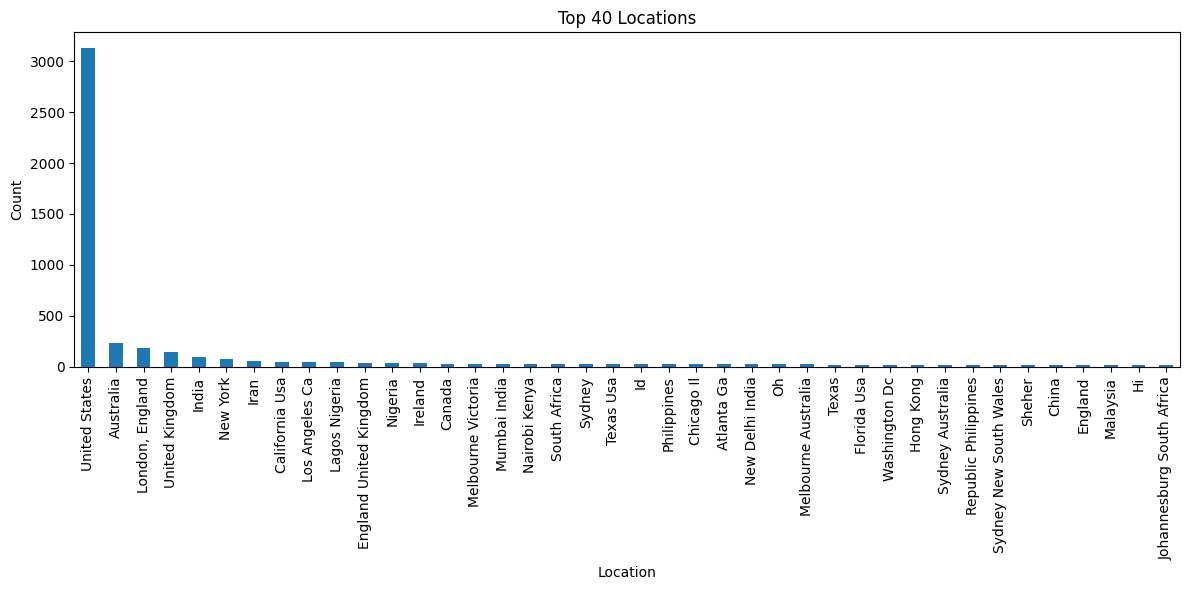

In [ ]:
import matplotlib.pyplot as plt
top_40_locations = Twitter_Data['location'].value_counts().head(40)
plt.figure(figsize=(12, 6))
top_40_locations.plot(kind='bar')
plt.title('Top 40 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
top_40_locations = Twitter_Data['location'].value_counts().head(40).reset_index()
top_40_locations.columns = ['Location', 'Count']

fig = px.bar(top_40_locations, x='Location', y='Count', title='Top 40 Locations')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
import geopy
from geopy.geocoders import Nominatim
import plotly.express as px
import pandas as pd

# Initialize Nominatim API
geolocator = Nominatim(user_agent="twitter_map")

# Function to get latitude and longitude
def get_coordinates(location):
    try:
        return geolocator.geocode(location).point[0:2]
    except:
        return [None, None]

# Get top 40 locations
top_40_locations = Twitter_Data['location'].value_counts().head(40).reset_index()
top_40_locations.columns = ['Location', 'Count']

# Add latitude and longitude columns
top_40_locations['Latitude'] = top_40_locations['Location'].apply(lambda x: get_coordinates(x)[0])
top_40_locations['Longitude'] = top_40_locations['Location'].apply(lambda x: get_coordinates(x)[1])

# Map
fig = px.scatter_geo(
    top_40_locations,
    lat='Latitude',
    lon='Longitude',
    hover_name='Location',
    size='Count',
    color='Count',  # Color by count
    projection='natural earth',
    title='Top 40 Locations',
    width=800,
    height=600,
    color_continuous_scale=px.colors.sequential.Jet  # Color scale
)

fig.update_layout(
    mapbox_style='open-street-map',
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [ ]:
import geopy
from geopy.geocoders import Nominatim
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Initialize Nominatim API
geolocator = Nominatim(user_agent="twitter_map")

# Function to get latitude and longitude
def get_coordinates(location):
    try:
        return geolocator.geocode(location).point[0:2]
    except:
        return [None, None]

# Get top 40 locations
top_40_locations = Twitter_Data['location'].value_counts().head(40).reset_index()
top_40_locations.columns = ['Location', 'Count']

# Add latitude and longitude columns
top_40_locations['Latitude'] = top_40_locations['Location'].apply(lambda x: get_coordinates(x)[0])
top_40_locations['Longitude'] = top_40_locations['Location'].apply(lambda x: get_coordinates(x)[1])

# Normalize 'Count' column
top_40_locations['Normalized Count'] = (top_40_locations['Count'] - top_40_locations['Count'].min()) / (top_40_locations['Count'].max() - top_40_locations['Count'].min())

# Map
fig = go.Figure(
    data=go.Scattergeo(
        lon=top_40_locations['Longitude'],
        lat=top_40_locations['Latitude'],
        text=top_40_locations['Location'],
        mode='markers',
        marker=dict(
            size=top_40_locations['Count'] / 10,
            color=np.linspace(0, 1, len(top_40_locations)),  # Full color gradient
            colorscale='Turbo',  # Color scale with orange and intermediate colors
            showscale=True,
            colorbar=dict(title='Count')
        )
    )
)

fig.update_layout(
    geo=dict(
        scope='world',
        projection_type='natural earth',
        projection_rotation_lon=0,
        showland=True,
        landcolor='rgb(217, 217, 217)',
        countrycolor='rgb(255, 255, 255)'
    ),
    title_text='Top 40 Locations',
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [ ]:
unique_locations_count = len(Twitter_Data['location'].unique())
print("Unique Locations Count:", unique_locations_count)

Unique Locations Count: 4186


In [ ]:
import geopy
from geopy.geocoders import Nominatim
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from tqdm import tqdm

# Initialize Nominatim API
geolocator = Nominatim(user_agent="twitter_map", timeout=10)

# Function to get latitude and longitude
def get_coordinates(location):
    try:
        result = geolocator.geocode(location)
        if result is None:
            return [None, None]
        return result.point[0:2]
    except (GeocoderTimedOut, GeocoderServiceError):
        time.sleep(1)
        return get_coordinates(location)

# Get top 1000 unique locations
top_1000_locations = Twitter_Data['location'].value_counts().head(1000).reset_index()
top_1000_locations.columns = ['Location', 'Count']

# Add latitude and longitude columns
for index, row in tqdm(top_1000_locations.iterrows(), total=len(top_1000_locations)):
    coordinates = get_coordinates(row['Location'])
    top_1000_locations.at[index, 'Latitude'] = coordinates[0]
    top_1000_locations.at[index, 'Longitude'] = coordinates[1]
    time.sleep(0.5)  # Rate limiting

# Remove rows with missing coordinates
top_1000_locations = top_1000_locations.dropna(subset=['Latitude', 'Longitude'])

# Log scaling
top_1000_locations['Normalized Count'] = np.log(top_1000_locations['Count']) / np.log(top_1000_locations['Count'].max())

# Map
fig = go.Figure(
    data=go.Scattergeo(
        lon=top_1000_locations['Longitude'],
        lat=top_1000_locations['Latitude'],
        text=top_1000_locations.apply(lambda row: f"Location: {row['Location']}\nCount: {row['Count']}", axis=1),
        mode='markers',
        marker=dict(
            size=top_1000_locations['Count'] / 100,
            color=top_1000_locations['Normalized Count'],
            colorscale='Turbo',
            showscale=True,
            colorbar=dict(title='Normalized Count')
        )
    )
)

fig.update_layout(
    geo=dict(
        scope='world',
        projection_type='natural earth',
        projection_rotation_lon=0,
        showland=True,
        landcolor='rgb(217, 217, 217)',
        countrycolor='rgb(255, 255, 255)'
    ),
    title_text='Top 1000 Unique Locations',
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


100%|██████████| 1000/1000 [12:17<00:00,  1.36it/s]


In [ ]:
#Using Plotly's Chloropleth Map
!pip install pycountry
import plotly.graph_objects as go

# Get top 1000 unique locations
top_1000_locations = Twitter_Data['location'].value_counts().head(1000).reset_index()
top_1000_locations.columns = ['Location', 'Count']

# Create a dictionary mapping locations to ISO codes (for country outlines)
import pycountry
location_iso = {}
for index, row in top_1000_locations.iterrows():
    try:
        country = pycountry.countries.get(name=row['Location'])
        location_iso[row['Location']] = country.alpha_3
    except:
        pass

# Map locations to ISO codes
top_1000_locations['ISO'] = top_1000_locations['Location'].apply(lambda x: location_iso.get(x))

# Remove rows with missing ISO codes
top_1000_locations = top_1000_locations.dropna(subset=['ISO'])

# Create the map
fig = go.Figure(
    data=go.Choropleth(
        locations=top_1000_locations['ISO'],
        z=top_1000_locations['Count'],
        text=top_1000_locations['Location'],
        colorscale='Turbo',
        autocolorscale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
    )
)

fig.update_layout(
    title_text='Top 1000 Unique Locations',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)',
        countrycolor='rgb(255, 255, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(0, 0, 0)',
        showframe=False,
    ),
    width=800,
    height=600,
)

fig.show()

# **FOR INDIA**

In [ ]:
print(Twitter_Data['location'].str.contains('India|India|New Delhi|Mumbai|Bangalore|Hyderabad|Ahmedabad|Chennai|Kolkata|Surat|Pune', case=False).sum())

367


In [ ]:
print("Type:", type(india_locations))
print("Length:", len(india_locations))
print("Empty?", india_locations.empty)

Type: <class 'pandas.core.frame.DataFrame'>
Length: 367
Empty? False


In [ ]:
import numpy as np
import plotly.graph_objects as go
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from tqdm import tqdm
import time

# Initialize Nominatim API
geolocator = Nominatim(user_agent="twitter_map_india", timeout=10)

# Function to get latitude and longitude
def get_coordinates(location):
    try:
        result = geolocator.geocode(location)
        if result is None:
            return [None, None]
        return [result.latitude, result.longitude]
    except (GeocoderTimedOut, GeocoderServiceError):
        time.sleep(1)
        return get_coordinates(location)

# Filter India locations
india_locations = Twitter_Data[Twitter_Data['location'].str.contains('India|New Delhi|Mumbai|Bangalore|Hyderabad|Ahmedabad|Chennai|Kolkata|Surat|Pune', case=False)]

# Add latitude and longitude columns
india_locations['Latitude'] = None
india_locations['Longitude'] = None

for index, row in tqdm(india_locations.iterrows(), total=len(india_locations)):
    coordinates = get_coordinates(row['location'])
    india_locations.at[index, 'Latitude'] = coordinates[0]
    india_locations.at[index, 'Longitude'] = coordinates[1]
    time.sleep(0.5)  # Rate limiting

# Remove rows with missing coordinates
india_locations = india_locations.dropna(subset=['Latitude', 'Longitude'])

# Calculate log counts
location_counts = india_locations['location'].value_counts()
india_locations['Log Count'] = india_locations['location'].map(np.log(location_counts))

# Map
fig = go.Figure(
    data=go.Scattergeo(
        lon=india_locations['Longitude'],
        lat=india_locations['Latitude'],
        text=india_locations.apply(lambda row: f"Location: {row['location']}\nCount: {location_counts[row['location']]}", axis=1),
        mode='markers',
        marker=dict(
            size=10,
            color=india_locations['Log Count'],
            colorscale='Turbo',
            showscale=True,
            colorbar=dict(title='Log Count')
        )
    )
)

fig.update_layout(
    geo=dict(
        scope='asia',
        projection_type='natural earth',
        projection_rotation_lon=80,
        showland=True,
        landcolor='rgb(217, 217, 217)',
        countrycolor='rgb(255, 255, 255)'
    ),
    title_text='India Locations',
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

100%|██████████| 367/367 [04:27<00:00,  1.37it/s]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="disaster_map", timeout=10)

# Load your data
data = pd.read_csv('your_data.csv')

# Create latitude and longitude columns
data['latitude'] = None
data['longitude'] = None

# Geocode locations with progress bar
from tqdm import tqdm
for index, row in tqdm(data.iterrows(), total=len(data)):
    location = geolocator.geocode(row['location'])
    if location:
        data.loc[index, 'latitude'] = location.latitude
        data.loc[index, 'longitude'] = location.longitude

# Filter out rows with None latitude or longitude values
data = data.dropna(subset=['latitude', 'longitude'])

# Load your image
img = Image.open('/content/INDIA.jpg')

# Plot disaster locations on the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
ax.scatter(data['longitude'], data['latitude'], color='red', s=10)

# Add location labels (optional)
for index, row in data.iterrows():
    ax.annotate(row['location'], (row['longitude'], row['latitude']), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()

**VECTORIZATION FOR TEXT**

In [82]:
#TF-IDF (Term Frequency-Inverse Document Frequency) vectorization on the text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Twitter_Data['text'])

## **SAMPLING AND BALANCING**

In [83]:
# Print class distribution before SMOTE
print("CHECK BALANCING", Twitter_Data['target'].value_counts())

CHECK BALANCING target
0    9256
1    2114
Name: count, dtype: int64


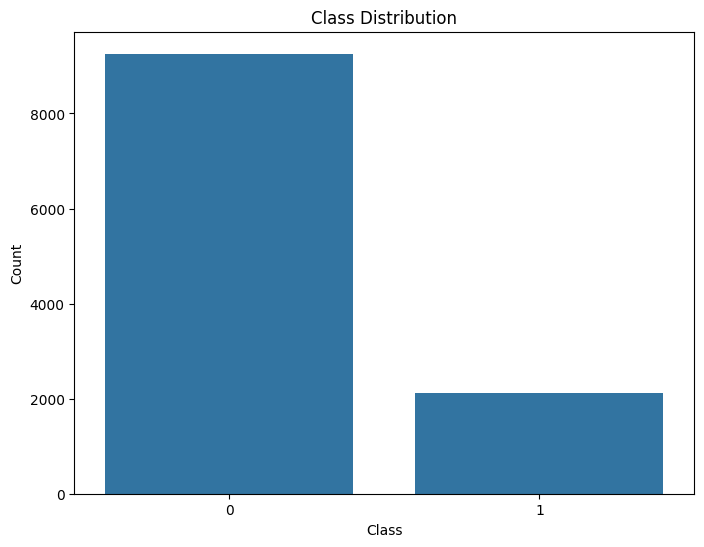

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=Twitter_Data['target'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**THE DIFFERENT SAMPLING TECHNIQUES ARE:**

Oversampling Techniques
1. Random Oversampling (ROS)
2. SMOTE (Synthetic Minority Over-sampling Technique)
3. Adaptive Synthetic Sampling (ADASYN)
4. Borderline SMOTE (BSMOTE)
5. Safe-Level-SMOTE

Undersampling Techniques
1. Random Undersampling (RUS)
2. NearMiss
3. Tomek Links

In [85]:
from imblearn.over_sampling import SMOTE
# Initializing SMOTE
smote = SMOTE(random_state=42)
# Fit and transform data
X_resampled, y_resampled = smote.fit_resample(X,Twitter_Data['target'])

# Print class distribution after SMOTE
print("After SMOTE METHOD:", y_resampled.value_counts())

After SMOTE METHOD: target
1    9256
0    9256
Name: count, dtype: int64


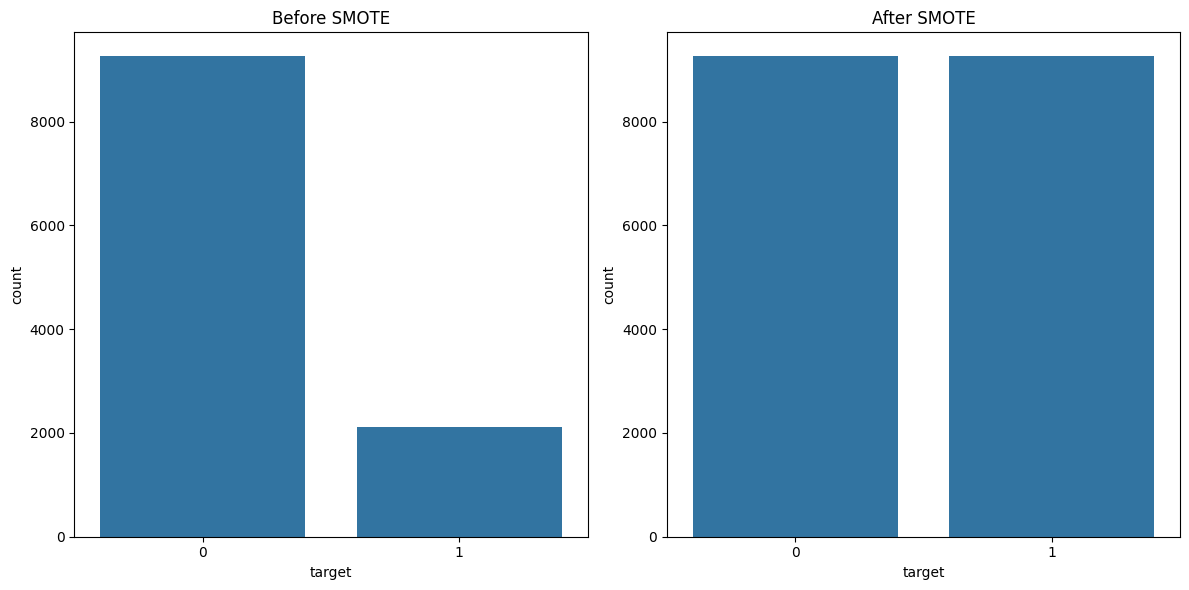

In [86]:
plt.figure(figsize=(12, 6))
sns.countplot(x=Twitter_Data['target'], ax=plt.subplot(1, 2, 1))
plt.title('Before SMOTE')
sns.countplot(x=y_resampled, ax=plt.subplot(1, 2, 2))
plt.title('After SMOTE')
plt.tight_layout()
plt.show()

**SPLITTING**

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [88]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler(with_mean=False)
X_train_scaled = st.fit_transform(X_train)
X_test_scaled = st.transform(X_test)

# **WEEK 4**

**MODEL 1. LINEAR REGRESSION**

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
#Initialize Linear Regression model
lr_model = LinearRegression()

In [93]:
# Train Linear Regression model
lr_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
# Convert predictions to binary class labels (0 or 1)
y_pred_lr_binary = (y_pred_lr >= 0.5).astype(int)

In [94]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr_binary))
print("Linear Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_binary))
print("Linear Regression ROC-AUC:", roc_auc_score(y_test, y_pred_lr))

Linear Regression Accuracy: 0.9249257358898191
Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1869
           1       0.87      1.00      0.93      1834

    accuracy                           0.92      3703
   macro avg       0.93      0.93      0.92      3703
weighted avg       0.93      0.92      0.92      3703

Linear Regression ROC-AUC: 0.9779108487034921


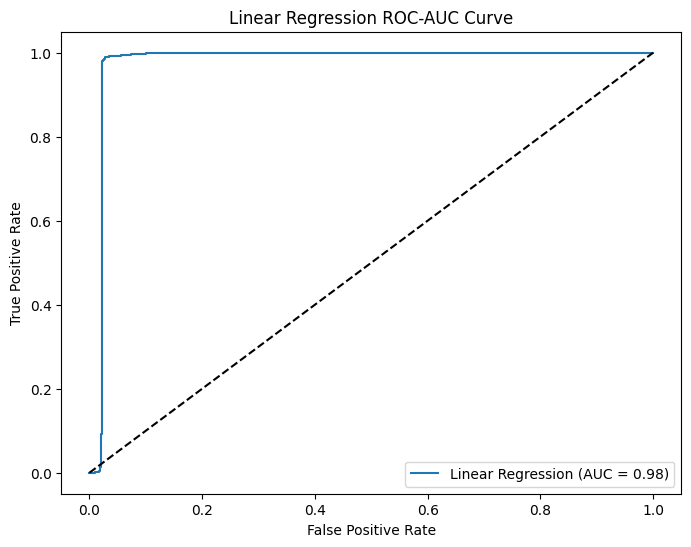

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC
auc = roc_auc_score(y_test, y_pred_lr)

# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Linear Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Regression ROC-AUC Curve')
plt.legend()
plt.show()

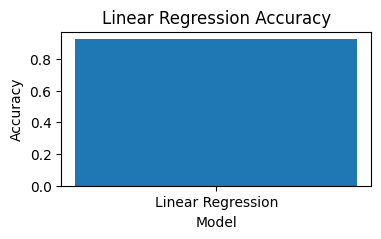

In [96]:
import matplotlib.pyplot as plt
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr_binary)

# Plot accuracy
plt.figure(figsize=(4, 2))
plt.bar(['Linear Regression'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Linear Regression Accuracy')
plt.show()

**MODEL 2. SUPPORT VECTOR MACHINE ( SVM )**

In [97]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [98]:
# Initialize SVM model
svm_model = LinearSVC(C=0.1, random_state=42)

In [99]:
# Train Linear SVM model
svm_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [100]:
# Evaluate model
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
# note: LinearSVC doesn't provide probabilities
# Use decision function instead
y_pred_svm_dec = svm_model.decision_function(X_test_scaled)
print("Linear SVM ROC-AUC:", roc_auc_score(y_test, y_pred_svm_dec))

Linear SVM Accuracy: 0.9443694301917365
Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1869
           1       0.90      0.99      0.95      1834

    accuracy                           0.94      3703
   macro avg       0.95      0.94      0.94      3703
weighted avg       0.95      0.94      0.94      3703

Linear SVM ROC-AUC: 0.9858854769285705


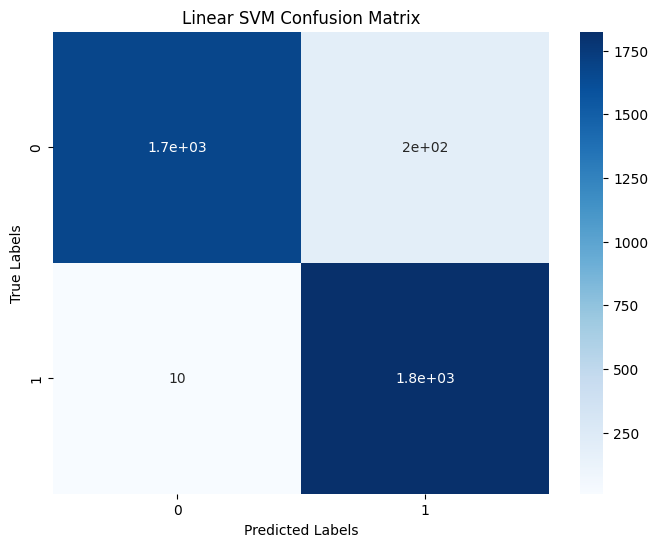

In [101]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear SVM Confusion Matrix')
plt.show()

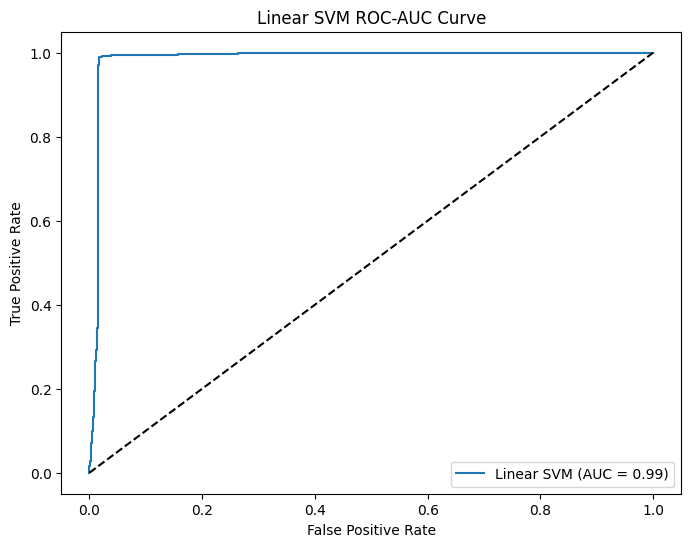

In [ ]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate ROC-AUC
auc = roc_auc_score(y_test, y_pred_svm_dec)
# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_svm_dec)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Linear SVM (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear SVM ROC-AUC Curve')
plt.legend()
plt.show()

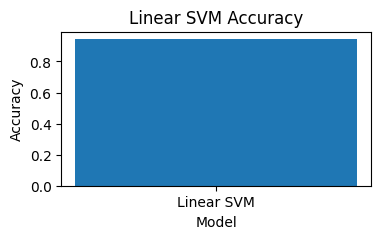

In [102]:
#Accuracy Plot
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)

# Plot accuracy
plt.figure(figsize=(4, 2))
plt.bar(['Linear SVM'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Linear SVM Accuracy')
plt.show()

**METHOD 3. Random Forest Classifier**

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [104]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [105]:
#Train Random Forest Classifier
rf_model.fit(X_train_scaled, y_train)
#Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))

Random Forest Accuracy: 0.9619227653254119
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1869
           1       0.97      0.95      0.96      1834

    accuracy                           0.96      3703
   macro avg       0.96      0.96      0.96      3703
weighted avg       0.96      0.96      0.96      3703

Random Forest ROC-AUC: 0.9918528093971957


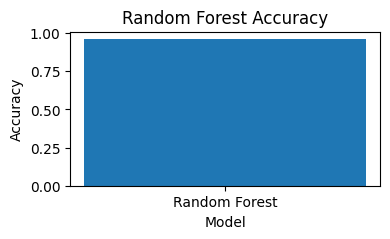

In [106]:
#Accuracy Plot
import matplotlib.pyplot as plt
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
# Plot accuracy
plt.figure(figsize=(4, 2))
plt.bar(['Random Forest'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

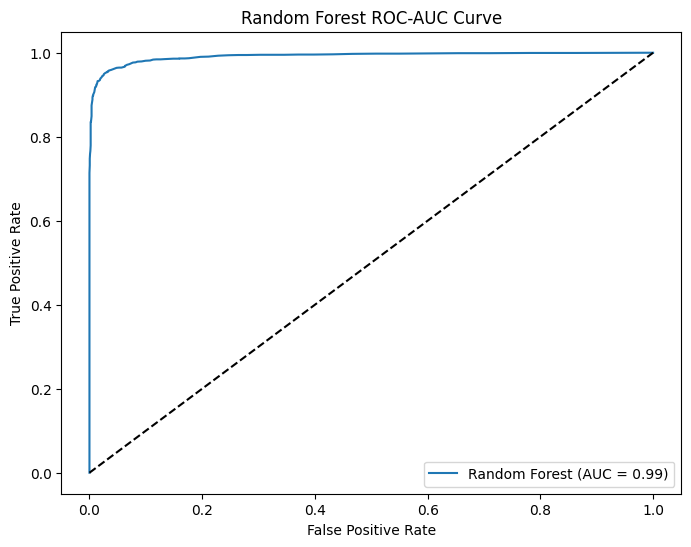

In [107]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate ROC-AUC
auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC-AUC Curve')
plt.legend()
plt.show()

**METHOD 4.Gradient Boosting Classifier**

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    random_state=42
)
# Train Gradient Boosting Classifier with parallel processing
def train_gb_model(X_train, y_train):
    return gb_model.fit(X_train, y_train)

from joblib import parallel_backend
with parallel_backend('multiprocessing'):
    gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1]))

Gradient Boosting Accuracy: 0.8236564947339995
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1869
           1       0.91      0.71      0.80      1834

    accuracy                           0.82      3703
   macro avg       0.84      0.82      0.82      3703
weighted avg       0.84      0.82      0.82      3703

Gradient Boosting ROC-AUC: 0.9006246378815699


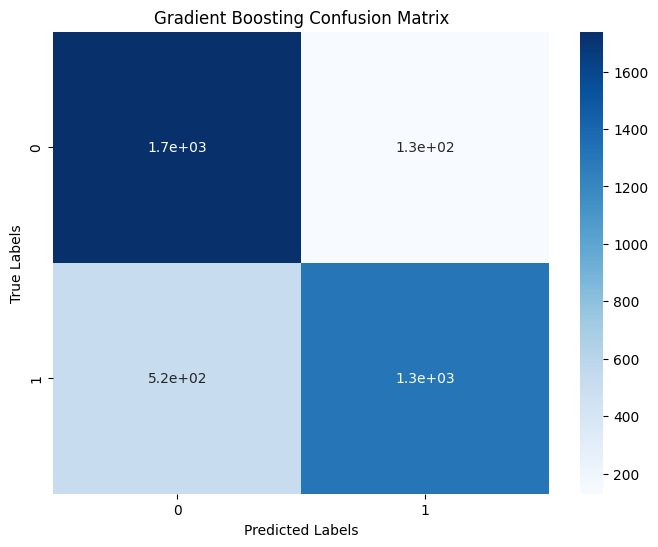

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

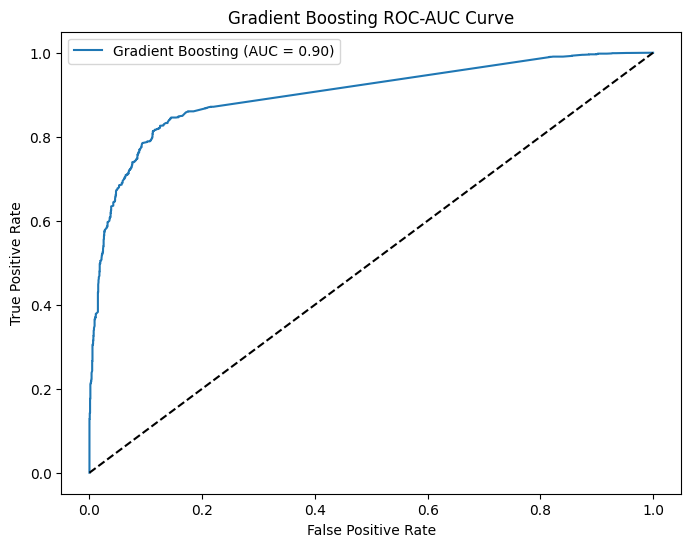

In [ ]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])
fpr, tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC-AUC Curve')
plt.legend()
plt.show()

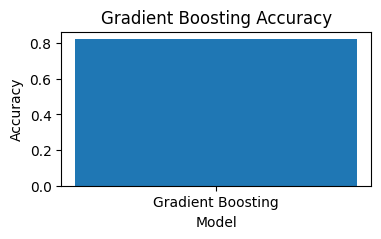

In [110]:
#Accuracy Plot
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_gb)
plt.figure(figsize=(4,2))
plt.bar(['Gradient Boosting'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Accuracy')
plt.show()

**METHOD 5. Logistic Regression with Regularization**

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

In [113]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression Accuracy: 0.9478800972184716
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1869
           1       0.91      1.00      0.95      1834

    accuracy                           0.95      3703
   macro avg       0.95      0.95      0.95      3703
weighted avg       0.95      0.95      0.95      3703

Logistic Regression ROC-AUC: 0.993780460979314


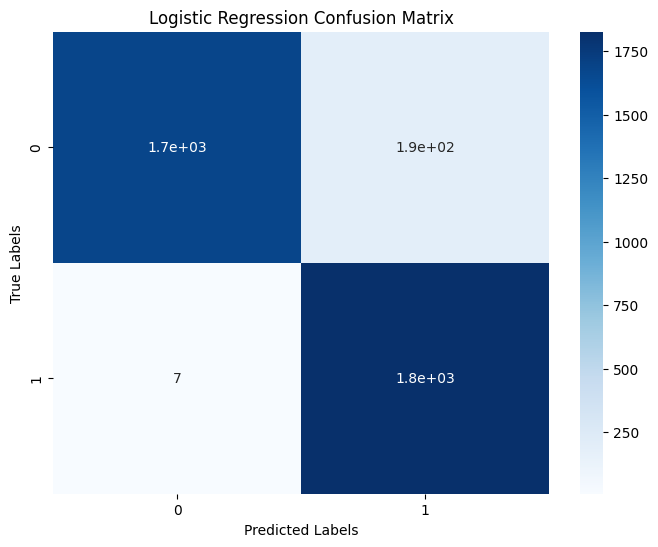

In [114]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

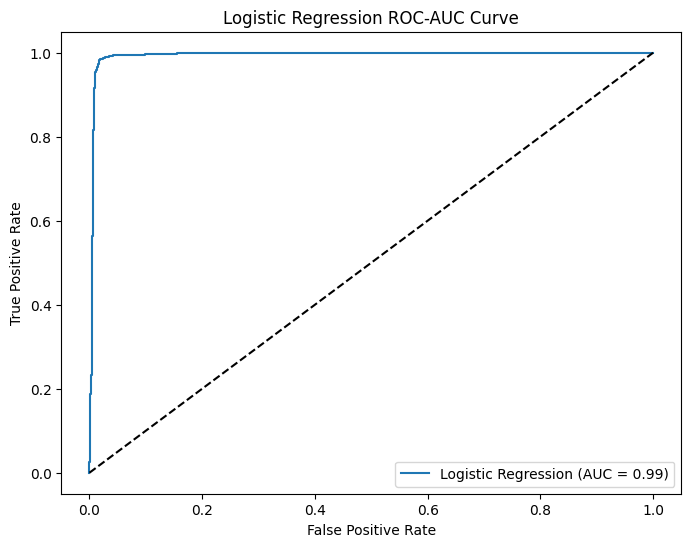

In [115]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC-AUC Curve')
plt.legend()
plt.show()

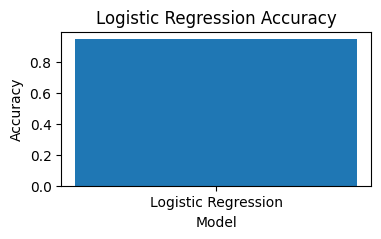

In [116]:
#Accuracy Plot
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred_lr)
plt.figure(figsize=(4, 2))
plt.bar(['Logistic Regression'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()

**METHOD 6. XGBoost**

In [117]:
import xgboost as xgb

In [118]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', max_depth=5, learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [119]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1]))

XGBoost Accuracy: 0.8471509586821496
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1869
           1       0.92      0.75      0.83      1834

    accuracy                           0.85      3703
   macro avg       0.86      0.85      0.85      3703
weighted avg       0.86      0.85      0.85      3703

XGBoost ROC-AUC: 0.9292231688112245


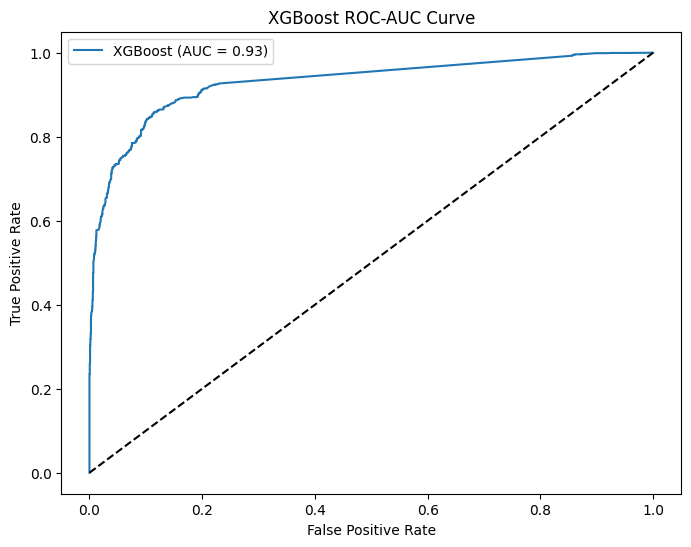

In [120]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC-AUC Curve')
plt.legend()
plt.show()

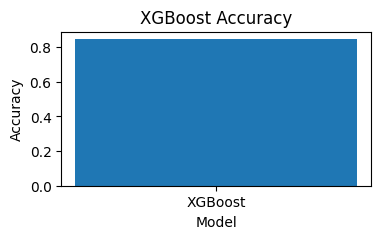

In [ ]:
#Accuracy Plot
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_xgb)
plt.figure(figsize=(4, 2))
plt.bar(['XGBoost'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy')
plt.show()

**METHOD 7. K-Nearest Neighbors (KNN)**

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [122]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train KNN model
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)


In [123]:
# Evaluate model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN ROC-AUC:", roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1]))

KNN Accuracy: 0.9540912773426952
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1869
           1       0.97      0.94      0.95      1834

    accuracy                           0.95      3703
   macro avg       0.95      0.95      0.95      3703
weighted avg       0.95      0.95      0.95      3703

KNN ROC-AUC: 0.9890963332755695


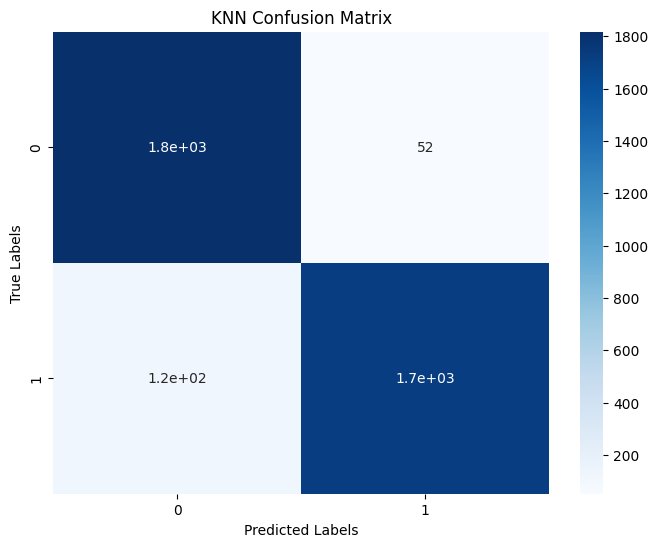

In [124]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix')
plt.show()

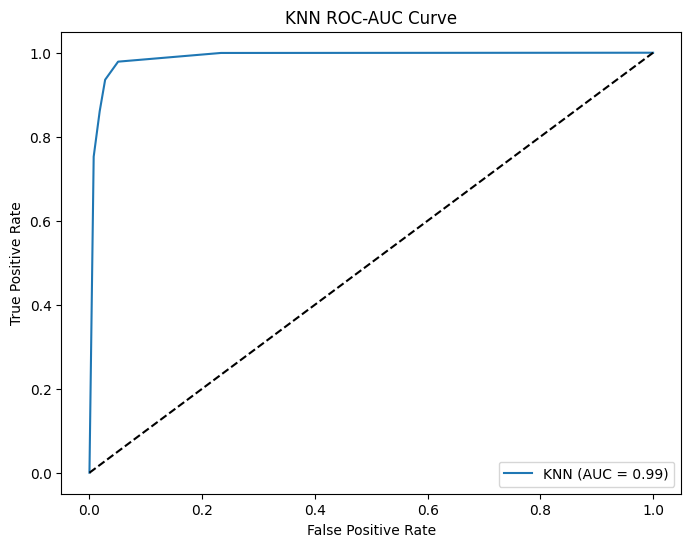

In [125]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC
auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC-AUC Curve')
plt.legend()
plt.show()

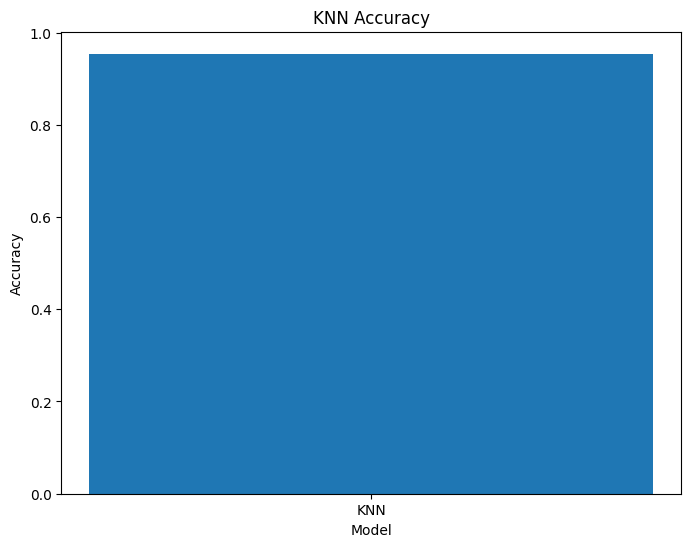

In [126]:
#Accuracy Plot
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.bar(['KNN'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.show()